In [1]:
import pandas as pd
players = pd.read_csv("data/players.csv", encoding='latin1', index_col=0)

In [2]:
players.head()

,first_name,last_name,hand,birth_date,country_code
player_id,,,,,
200001,Martina,Hingis,R,19800930.0,SUI
200002,Mirjana,Lucic,R,19820309.0,CRO
200003,Justine,Henin,R,19820601.0,BEL
200004,Kerry Anne,Guse,R,19721204.0,AUS
200005,Jolene,Watanabe Giltz,R,19680831.0,USA


In [3]:
# Top column is misaligned.
players.index.name = 'ID'
players.columns = ['First' , 'Last', 'Handidness', 'DOB', 'Country']

# Parse date data to dates.
players = players.assign(DOB=pd.to_datetime(players['DOB'], format='%Y%m%d'))

# Handidness is reported as U if unknown; set np.nan instead.
import numpy as np
players = players.assign(Handidness=players['Handidness'].replace('U', np.nan))

In [4]:
players.head()

,First,Last,Handidness,DOB,Country
ID,,,,,
200001,Martina,Hingis,R,1980-09-30,SUI
200002,Mirjana,Lucic,R,1982-03-09,CRO
200003,Justine,Henin,R,1982-06-01,BEL
200004,Kerry Anne,Guse,R,1972-12-04,AUS
200005,Jolene,Watanabe Giltz,R,1968-08-31,USA


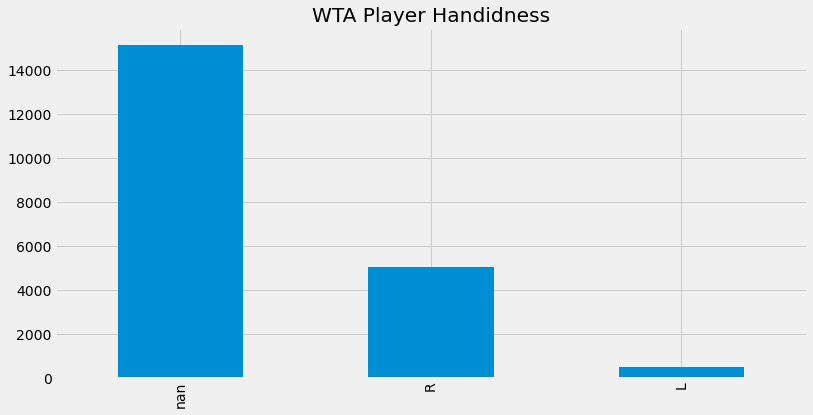

In [5]:
# There's a well-known supposition in tennis that left-handed = better. 
# What does the historical data say?
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
players.Handidness.value_counts(dropna=False).plot.bar(figsize=(12, 6),
                                title='WTA Player Handidness')

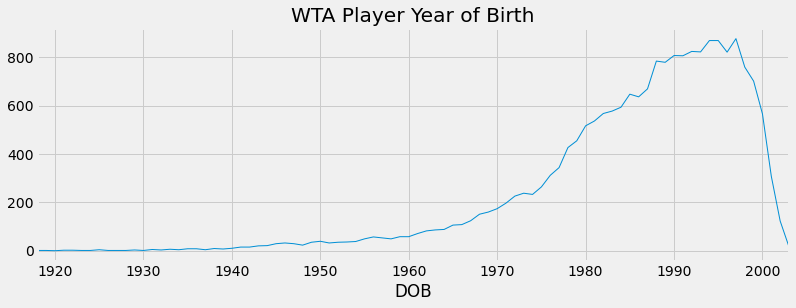

In [7]:
# Unfortunately too many records are left unknown to confirm much!
# Next let's look at the trend of WTA player birth years.
players.set_index('DOB').resample('Y').count().Country.plot.line(
    linewidth=1, 
    figsize=(12, 4),
    title='WTA Player Year of Birth')